# Proyecto Flask + ML: Clasificador de Nivel de Obesidad
Proyecto Flask + ML: Clasificador de Nivel de Obesidad
El objetivo es crear una app web simple donde el usuario responda preguntas sobre hábitos alimenticios y físicos, y el modelo prediga su nivel de obesidad (NORM, OVER, OBESO, etc.). Usamos el dataset "Obesity or CVD Risk" de Kaggle.

In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [27]:
# CARGA DE DATOS
df = pd.read_csv('obesity.csv')

print("Dimensiones:", df.shape)
df.head()

Dimensiones: (2111, 17)


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [28]:
# INFO GENERAL Y ESTADÍSTICOS
print("INFORMACIÓN GENERAL DEL DATASET:")
print(df.info())

print("\nESTADÍSTICOS DESCRIPTIVOS:")
print(df.describe(include='all'))

INFORMACIÓN GENERAL DEL DATASET:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  F

In [29]:
# VERIFICACIÓN DE NULOS Y DUPLICADOS
print("Valores nulos por columna:")
print(df.isnull().sum())

print(f"\nFilas duplicadas: {df.duplicated().sum()}")

Valores nulos por columna:
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

Filas duplicadas: 24


In [30]:
# ELIMINAMOS DUPLICADOS
df = df.drop_duplicates()
print(f"Nuevas dimensiones tras eliminar duplicados: {df.shape}")

Nuevas dimensiones tras eliminar duplicados: (2087, 17)


In [31]:
# PREPROCESAMIENTO
cat_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']
num_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

# Label encoding para categóricas (excepto target al final)
le_dict = {}
for col in cat_cols[:-1]:  # Sin target
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    le_dict[col] = le

# Encoding target
le_target = LabelEncoder()
df['NObeyesdad'] = le_target.fit_transform(df['NObeyesdad'])
le_dict['NObeyesdad'] = le_target

# Guardamos encoders
joblib.dump(le_dict, 'label_encoders.pkl')

# X e y
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

# Escalado numéricas
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])
joblib.dump(scaler, 'scaler.pkl')

# TRAIN-TEST
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Train:", X_train.shape, "Test:", X_test.shape)

Train: (1669, 16) Test: (418, 16)


Accuracy: 0.9545454545454546
                     precision    recall  f1-score   support

Insufficient_Weight       1.00      0.94      0.97        53
      Normal_Weight       0.84      0.95      0.89        57
     Obesity_Type_I       1.00      0.97      0.99        70
    Obesity_Type_II       0.98      1.00      0.99        60
   Obesity_Type_III       1.00      0.98      0.99        65
 Overweight_Level_I       0.89      0.91      0.90        55
Overweight_Level_II       0.96      0.91      0.94        58

           accuracy                           0.95       418
          macro avg       0.95      0.95      0.95       418
       weighted avg       0.96      0.95      0.96       418



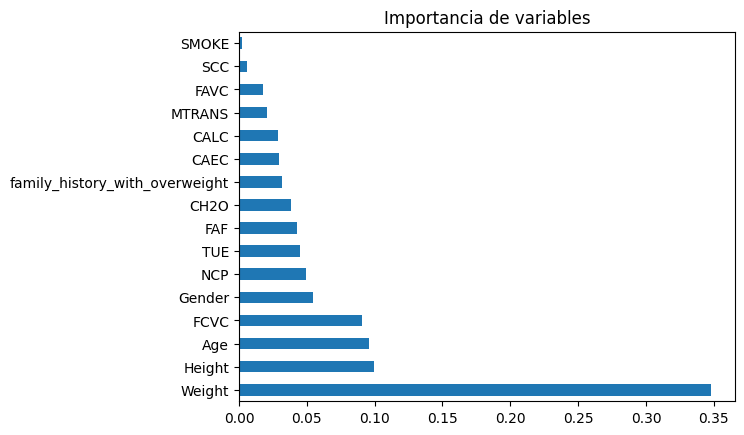

Modelo guardado.


In [32]:
# MODELO - RANDOM FOREST
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

# PREDICCIONES
y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=le_target.classes_))

# IMPORTANCIA
imp = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
imp.plot(kind='barh')
plt.title('Importancia de variables')
plt.show()

# GUARDAR MODELO
joblib.dump(rf, 'obesity_model.pkl')
print("Modelo guardado.")